# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [5]:
# Libraries
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

# Challenge 1

#### Read the `employees` dataset from Ironhack's database:
* db: `employees`
* table: `employees`

Save your data in a variable called `employees`.

In [86]:
# your code here
employees = pd.read_csv('../data/Employee.csv')

#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [87]:
employees.head(10)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


In [13]:
# Method 1
# your code here
employees.groupby(by='Department')['Salary'].mean()

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

In [14]:
# Method 2
# your code here
employees.pivot_table(index='Department', values='Salary')

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [15]:
# your code here
employees.pivot_table(index=['Department', 'Title'], values='Salary')

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [18]:
# your code here
employees.pivot_table(index='Title', columns = ['Years'], values=['Salary'])

Salary                              
Years          1     2     3     4     7     8
Title                                         
VP           NaN   NaN   NaN   NaN   NaN  70.0
analyst     35.0  30.0   NaN  35.0   NaN   NaN
associate    NaN  55.0  55.0   NaN  60.0   NaN

#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [34]:
# your code here
employees.pivot_table(index=['Department', 'Title'], values='Salary', aggfunc=['mean', 'count'])

mean  count
                     Salary Salary
Department Title                  
HR         VP          70.0      1
           analyst     32.5      2
IT         VP          70.0      1
           analyst     32.5      2
           associate   60.0      1
Sales      associate   55.0      2

#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [21]:
# your code here
employees.pivot_table(index=['Department', 'Title'], values='Salary', aggfunc=['median', 'min', 'max', 'std'])

median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

In [ ]:
"""
your commments here
"""

#### Based on your comments, fill the missing values with an appropriate value.

In [28]:
# your code here
employees.pivot_table(index=['Department', 'Title'], values='Salary', aggfunc=['median', 'min', 'max', 'std'], fill_value = 0)

median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [29]:
# your code here
employees.pivot_table(index=['Department'], values='Salary', aggfunc=['count', 'sum'])

,count,sum
,Salary,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [102]:
# your code here
employees.pivot_table(index=['Department', 'Title'], aggfunc={'Years':'sum', 'Salary':'mean'})

Salary  Years
Department Title                   
HR         analyst      32.5      6
IT         analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

In [88]:
# your code here
def challenge(aList):
    lista = aList.groupby(by='Department')['Salary'].max()
    for i in range(2):
        x = lista[i]
        aList.drop(aList.loc[aList['Salary']== x ].index, inplace=True)
    return aList.pivot_table(index = 'Department', values = 'Salary', aggfunc = ['mean', 'max'])

In [89]:
challenge(employees)

,mean,max
,Salary,Salary
Department,,
HR,32.500000,35
IT,41.666667,60
Sales,55.000000,55


# Challenge 2

#### Read the `fitbit` dataset from Ironhack's database:
* db: `fitbit`
* table: `fitbit`

Save your data in a variable called `fitbit`.

In [45]:
# your code here
fitbit = pd.read_csv('../data/Fitbit.csv')

#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [48]:
# your code here
fitbit.describe().T

,count,mean,std,min,25%,50%,75%,max
Calorie burned,367.0,2741.501362,916.307036,179.000,2698.000,2974.00,3233.00,4351.00
Steps,367.0,10121.588556,5594.836225,0.000,6730.500,10413.00,13916.50,26444.00
Distance,367.0,8.549128,3.409881,0.000,6.155,8.29,10.56,20.45
Floors,367.0,11.724796,10.337370,0.000,5.000,11.00,16.00,101.00
Minutes Sedentary,367.0,563.934482,294.793145,1.002,520.000,663.00,756.50,998.00
Minutes Lightly Active,367.0,236.405995,86.531376,0.000,179.000,226.00,290.00,472.00
Minutes Fairly Active,367.0,26.163488,20.319456,0.000,8.000,24.00,41.50,101.00
Minutes Very Active,367.0,35.722071,31.006682,0.000,10.500,29.00,54.00,153.00
Activity Calories,367.0,2044.147139,2041.267168,0.000,1218.500,1553.00,1927.50,9830.00
MinutesOfSleep,367.0,290.479564,154.752328,0.000,224.000,337.00,400.50,553.00


In [49]:
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
Date                      367 non-null object
Calorie burned            367 non-null int64
Steps                     367 non-null int64
Distance                  367 non-null float64
Floors                    367 non-null int64
Minutes Sedentary         367 non-null float64
Minutes Lightly Active    367 non-null int64
Minutes Fairly Active     367 non-null int64
Minutes Very Active       367 non-null int64
Activity Calories         367 non-null int64
MinutesOfSleep            367 non-null int64
MinutesOfBeingAwake       367 non-null int64
NumberOfAwakings          367 non-null int64
LengthOfRestInMinutes     367 non-null int64
dtypes: float64(2), int64(11), object(1)
memory usage: 40.3+ KB


#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [65]:
# your code here
fitbit[['Minutes Very Active', 'Steps']].corr()

,Minutes Very Active,Steps
Minutes Very Active,1.000000,0.571452
Steps,0.571452,1.000000


#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [66]:
import matplotlib.pyplot as plt;

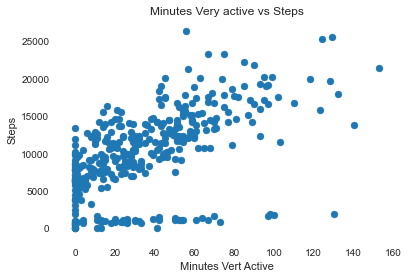

In [70]:
plt.scatter(x = fitbit['Minutes Very Active'], y = fitbit['Steps'])
plt.title('Minutes Very active vs Steps')
plt.xlabel('Minutes Very Active')
plt.ylabel('Steps')
plt.show()

#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

In [ ]:
"""
your commments here
"""

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [71]:
# your code here
fitbit[['Minutes Sedentary', 'Steps']].corr()

,Minutes Sedentary,Steps
Minutes Sedentary,1.000000,0.076906
Steps,0.076906,1.000000


#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

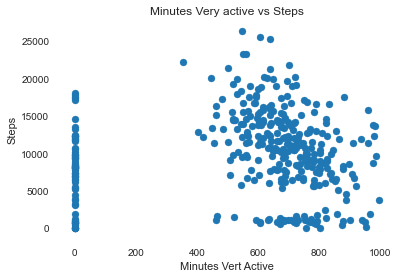

In [72]:
# your code here
plt.scatter(x = fitbit['Minutes Sedentary'], y = fitbit['Steps'])
plt.title('Minutes Sedentary vs Steps')
plt.xlabel('Minutes Sedentary')
plt.ylabel('Steps')
plt.show()

In [ ]:
"""
your commments here
"""

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [74]:
# your code here
fitbit[['MinutesOfSleep', 'Steps']].corr()

,MinutesOfSleep,Steps
MinutesOfSleep,1.000000,0.130986
Steps,0.130986,1.000000


#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

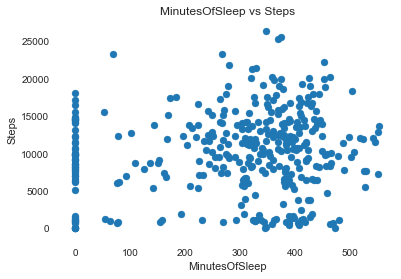

In [75]:
# your code here
plt.scatter(x = fitbit['MinutesOfSleep'], y = fitbit['Steps'])
plt.title('MinutesOfSleep vs Steps')
plt.xlabel('MinutesOfSleep')
plt.ylabel('Steps')
plt.show()

In [ ]:
"""
your commments here
"""

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [ ]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

In [77]:
# your code here
cor_fit = fitbit[['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']]

In [79]:
cor_fit.corr()

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

In [82]:
# your code here
cor_fit.corr().sort_values(by='Steps', ascending=False)

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242


# Challenge 3

#### Read the `time_grades` dataset from Ironhack's database:
* db: `time_grades`
* table: `time_grades`

Save your data in a variable called `time_grades`.

In [84]:
# your code here
time_grades = pd.read_csv('../data/Time_Grades.csv')

#### Show visually the frequency distribution of the `time_grades` dataset.

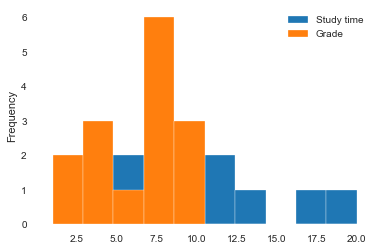

In [85]:
# your code here
time_grades.plot(kind = 'hist')

#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [93]:
# your code here
time_grades[['Study time', 'Grade']].corr(method = 'pearson')

,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


In [95]:
time_grades[['Study time', 'Grade']].corr(method = 'spearman')

,Study time,Grade
Study time,1.000000,0.819659
Grade,0.819659,1.000000


In [ ]:
"""
your commments here
"""

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

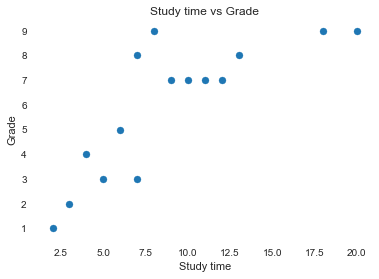

In [104]:
# your code here
plt.scatter(x = time_grades['Study time'], y = time_grades['Grade'])
plt.title('Study time vs Grade')
plt.xlabel('Study time')
plt.ylabel('Grade')
plt.show()

#### Could you explain the difference between Pearson and Spearman correlations?

In [ ]:
"""
The difference between the Pearson correlation and the Spearman correlation
is that the Pearson is most appropriate for measurements taken from an interval scale, 
while the Spearman is more appropriate for measurements taken from ordinal scales.
"""
